In [1]:
import matplotlib.pyplot as plt                    # For Plotting
import numpy as np                                 # Maths :)
import torch as torch                              # EVEN MORE MATHS :)  
import torchvision.datasets as datasets            #
from torchvision.transforms import ToTensor 
import pandas as pd
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class data(Dataset):
    
  def __init__(self, X, Y):
    self.X = X
    self.Y = Y
    if len(self.X) != len(self.Y):
      raise Exception("The length of X does not match the length of Y")

  def __len__(self):
    return len(self.X)

  def __getitem__(self, index):
    # note that this isn't randomly selecting. It's a simple get a single item that represents an x and y
    _x = self.X[index].unsqueeze(dim=0)
    _y = self.Y[index].unsqueeze(dim=0)

    return _x, _y

# Importing MNIST
mnist_trainset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())
mnist_testset = datasets.MNIST(root='./data', train=True, download=True, transform=ToTensor())

bs = 200

# Data Loader
train_loader = torch.utils.data.DataLoader(dataset=mnist_trainset, batch_size=bs, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=mnist_testset, batch_size=bs, shuffle=False)

In [2]:
class VAE(nn.Module):

    def __init__(self):
        super(VAE,self).__init__()
        
        # define encoder layers
        self.e_dense1 = nn.Linear(784,64)
        self.e_dense2 = nn.Linear(64, 32)
        self.e_dense3 = nn.Linear(32, 8)
        
        # define dencoder layers
        self.d_dense1 = nn.Linear(4,32)
        self.d_dense2 = nn.Linear(32, 64)
        self.d_dense3 = nn.Linear(64, 784)


    def encode(self, x):
        x = torch.relu(self.e_dense1(x))
        x = torch.relu(self.e_dense2(x))
        x = (self.e_dense3(x))
        return x[:,:4],x[:,4:]
    
    def sample(self,μ,log_var):
        σ = torch.exp(0.5*log_var)
        ϵ = torch.randn_like(σ) # Sample from epsilon
        return μ + ϵ.mul(σ),ϵ # transform epsilon into z sample
    
    def decode(self, x):
        x = torch.tanh(self.d_dense1(x))
        x = torch.tanh(self.d_dense2(x))
        x = torch.sigmoid(self.d_dense3(x))
        return x
    
    def forward(self,x):
        μ,log_var = self.encode(x)
        z,ϵ = self.sample(μ,log_var)
        x = self.decode(z)
        return x,μ,log_var,ϵ,z
    
recon_error = nn.MSELoss(reduction="sum")  # Expectation wrt z of p(x|z)  
    
def variational_loss(model_x,x,μ,log_var,ϵ,z):
    KL = -0.5 * torch.sum(log_var + 1 - μ.pow(2) - log_var.exp()) # - KL Divergece between standard normal and current p(z) and q(z|x)
    return recon_error(model_x,x) + KL 

In [3]:
vae = VAE()
optimizer = optim.Adam(vae.parameters())
criterion = variational_loss

Epoch: 0 [20000/60000 (33%)]	Loss: 56.743223
Epoch: 0 [40000/60000 (67%)]	Loss: 53.090977
Epoch: 0 [60000/60000 (100%)]	Loss: 53.481611


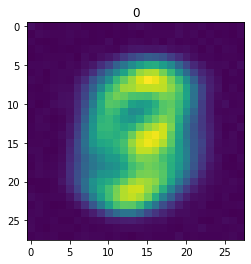

====> Epoch: 0 Average loss: 64.9165
Epoch: 1 [20000/60000 (33%)]	Loss: 51.148892
Epoch: 1 [40000/60000 (67%)]	Loss: 49.920889
Epoch: 1 [60000/60000 (100%)]	Loss: 48.251250


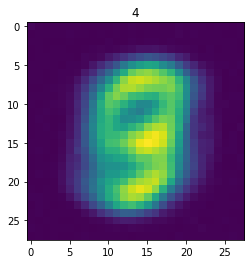

====> Epoch: 1 Average loss: 50.2290
Epoch: 2 [20000/60000 (33%)]	Loss: 47.546074
Epoch: 2 [40000/60000 (67%)]	Loss: 45.153872
Epoch: 2 [60000/60000 (100%)]	Loss: 44.894854


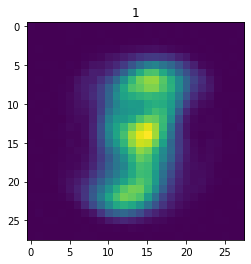

====> Epoch: 2 Average loss: 46.8816
Epoch: 3 [20000/60000 (33%)]	Loss: 43.959775
Epoch: 3 [40000/60000 (67%)]	Loss: 43.562354
Epoch: 3 [60000/60000 (100%)]	Loss: 44.295039


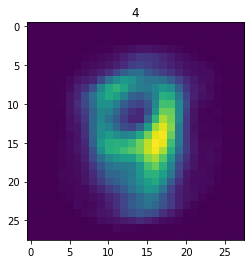

====> Epoch: 3 Average loss: 43.9699
Epoch: 4 [20000/60000 (33%)]	Loss: 43.152690
Epoch: 4 [40000/60000 (67%)]	Loss: 41.716274
Epoch: 4 [60000/60000 (100%)]	Loss: 42.134658


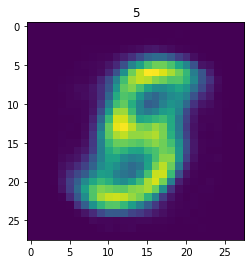

====> Epoch: 4 Average loss: 42.3857
Epoch: 5 [20000/60000 (33%)]	Loss: 40.375015
Epoch: 5 [40000/60000 (67%)]	Loss: 40.191470
Epoch: 5 [60000/60000 (100%)]	Loss: 42.298218


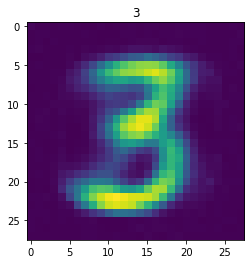

====> Epoch: 5 Average loss: 41.0773
Epoch: 6 [20000/60000 (33%)]	Loss: 41.315029
Epoch: 6 [40000/60000 (67%)]	Loss: 40.056602
Epoch: 6 [60000/60000 (100%)]	Loss: 38.509590


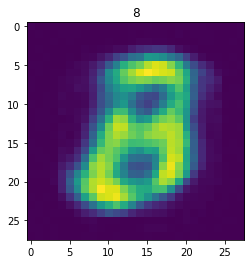

====> Epoch: 6 Average loss: 40.0667
Epoch: 7 [20000/60000 (33%)]	Loss: 39.995569
Epoch: 7 [40000/60000 (67%)]	Loss: 39.053855
Epoch: 7 [60000/60000 (100%)]	Loss: 37.824712


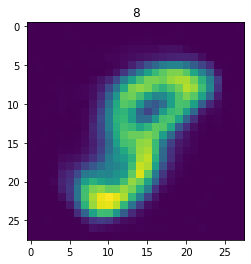

====> Epoch: 7 Average loss: 38.8767
Epoch: 8 [20000/60000 (33%)]	Loss: 36.884167
Epoch: 8 [40000/60000 (67%)]	Loss: 35.691077
Epoch: 8 [60000/60000 (100%)]	Loss: 37.071096


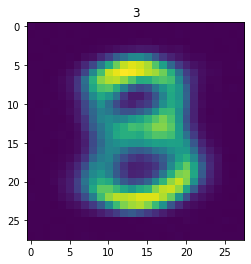

====> Epoch: 8 Average loss: 37.8958
Epoch: 9 [20000/60000 (33%)]	Loss: 37.750874
Epoch: 9 [40000/60000 (67%)]	Loss: 37.357539
Epoch: 9 [60000/60000 (100%)]	Loss: 37.486777


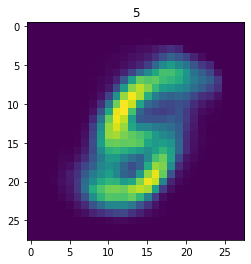

====> Epoch: 9 Average loss: 37.1858
Epoch: 10 [20000/60000 (33%)]	Loss: 37.038643
Epoch: 10 [40000/60000 (67%)]	Loss: 36.955579
Epoch: 10 [60000/60000 (100%)]	Loss: 36.855405


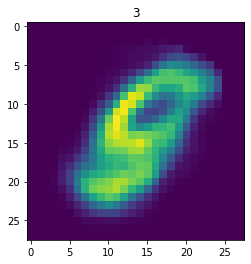

====> Epoch: 10 Average loss: 36.6744
Epoch: 11 [20000/60000 (33%)]	Loss: 36.591167
Epoch: 11 [40000/60000 (67%)]	Loss: 36.945972
Epoch: 11 [60000/60000 (100%)]	Loss: 36.377266


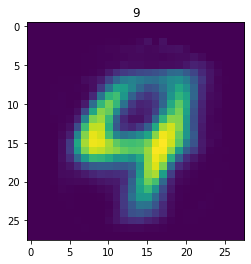

====> Epoch: 11 Average loss: 36.2286
Epoch: 12 [20000/60000 (33%)]	Loss: 35.240874
Epoch: 12 [40000/60000 (67%)]	Loss: 36.012764
Epoch: 12 [60000/60000 (100%)]	Loss: 36.660586


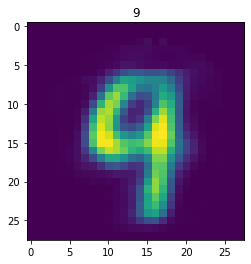

====> Epoch: 12 Average loss: 35.8895
Epoch: 13 [20000/60000 (33%)]	Loss: 35.845151
Epoch: 13 [40000/60000 (67%)]	Loss: 35.988237
Epoch: 13 [60000/60000 (100%)]	Loss: 34.747205


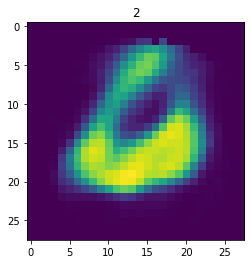

====> Epoch: 13 Average loss: 35.6160
Epoch: 14 [20000/60000 (33%)]	Loss: 35.738579
Epoch: 14 [40000/60000 (67%)]	Loss: 34.362129
Epoch: 14 [60000/60000 (100%)]	Loss: 35.296460


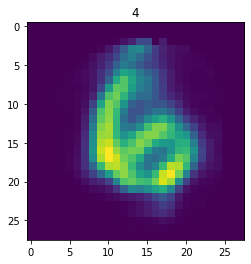

====> Epoch: 14 Average loss: 35.3640
Epoch: 15 [20000/60000 (33%)]	Loss: 34.207422
Epoch: 15 [40000/60000 (67%)]	Loss: 35.527539
Epoch: 15 [60000/60000 (100%)]	Loss: 33.786108


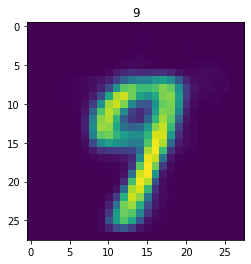

====> Epoch: 15 Average loss: 35.1574
Epoch: 16 [20000/60000 (33%)]	Loss: 35.643701
Epoch: 16 [40000/60000 (67%)]	Loss: 36.052930
Epoch: 16 [60000/60000 (100%)]	Loss: 35.282146


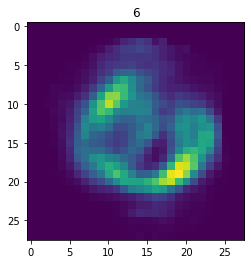

====> Epoch: 16 Average loss: 34.9953
Epoch: 17 [20000/60000 (33%)]	Loss: 34.728872
Epoch: 17 [40000/60000 (67%)]	Loss: 34.818516
Epoch: 17 [60000/60000 (100%)]	Loss: 34.439272


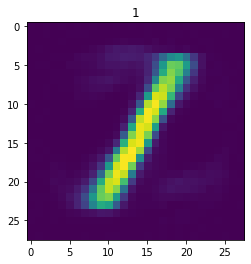

====> Epoch: 17 Average loss: 34.8403
Epoch: 18 [20000/60000 (33%)]	Loss: 33.816211
Epoch: 18 [40000/60000 (67%)]	Loss: 36.135056
Epoch: 18 [60000/60000 (100%)]	Loss: 36.087886


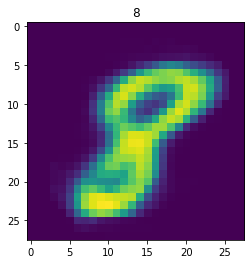

====> Epoch: 18 Average loss: 34.6776
Epoch: 19 [20000/60000 (33%)]	Loss: 35.648506
Epoch: 19 [40000/60000 (67%)]	Loss: 34.324258
Epoch: 19 [60000/60000 (100%)]	Loss: 33.630596


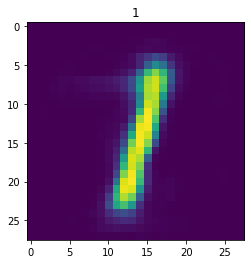

====> Epoch: 19 Average loss: 34.5792
Epoch: 20 [20000/60000 (33%)]	Loss: 33.636504
Epoch: 20 [40000/60000 (67%)]	Loss: 34.696050
Epoch: 20 [60000/60000 (100%)]	Loss: 33.574177


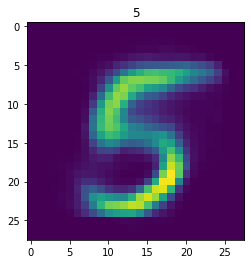

====> Epoch: 20 Average loss: 34.4634
Epoch: 21 [20000/60000 (33%)]	Loss: 34.938650
Epoch: 21 [40000/60000 (67%)]	Loss: 35.184585
Epoch: 21 [60000/60000 (100%)]	Loss: 34.833774


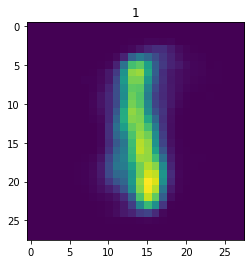

====> Epoch: 21 Average loss: 34.3556
Epoch: 22 [20000/60000 (33%)]	Loss: 34.417407
Epoch: 22 [40000/60000 (67%)]	Loss: 34.791445
Epoch: 22 [60000/60000 (100%)]	Loss: 33.514846


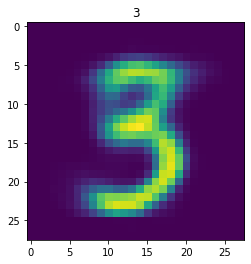

====> Epoch: 22 Average loss: 34.2556
Epoch: 23 [20000/60000 (33%)]	Loss: 35.750410
Epoch: 23 [40000/60000 (67%)]	Loss: 34.303469
Epoch: 23 [60000/60000 (100%)]	Loss: 34.066501


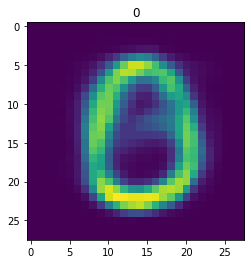

====> Epoch: 23 Average loss: 34.1946
Epoch: 24 [20000/60000 (33%)]	Loss: 33.680481
Epoch: 24 [40000/60000 (67%)]	Loss: 33.968667
Epoch: 24 [60000/60000 (100%)]	Loss: 32.806890


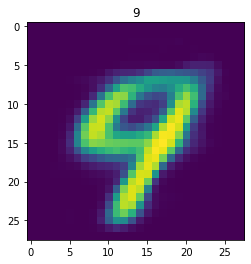

====> Epoch: 24 Average loss: 34.0744
Epoch: 25 [20000/60000 (33%)]	Loss: 32.649614
Epoch: 25 [40000/60000 (67%)]	Loss: 33.437695
Epoch: 25 [60000/60000 (100%)]	Loss: 34.613547


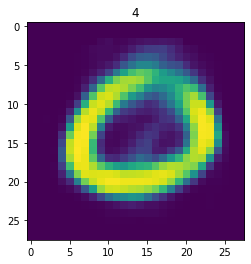

====> Epoch: 25 Average loss: 34.0142
Epoch: 26 [20000/60000 (33%)]	Loss: 34.800627
Epoch: 26 [40000/60000 (67%)]	Loss: 34.571287
Epoch: 26 [60000/60000 (100%)]	Loss: 32.576985


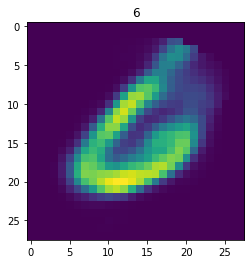

====> Epoch: 26 Average loss: 33.9384
Epoch: 27 [20000/60000 (33%)]	Loss: 33.454377
Epoch: 27 [40000/60000 (67%)]	Loss: 34.076963
Epoch: 27 [60000/60000 (100%)]	Loss: 34.334773


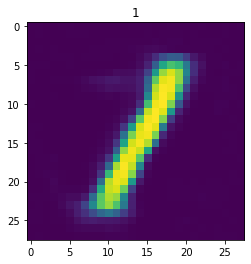

====> Epoch: 27 Average loss: 33.8755
Epoch: 28 [20000/60000 (33%)]	Loss: 33.616436
Epoch: 28 [40000/60000 (67%)]	Loss: 34.411917
Epoch: 28 [60000/60000 (100%)]	Loss: 35.447949


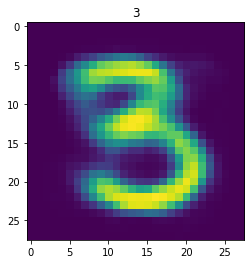

====> Epoch: 28 Average loss: 33.8075
Epoch: 29 [20000/60000 (33%)]	Loss: 32.865466
Epoch: 29 [40000/60000 (67%)]	Loss: 34.344519
Epoch: 29 [60000/60000 (100%)]	Loss: 32.522795


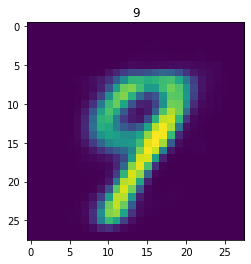

====> Epoch: 29 Average loss: 33.7617
Epoch: 30 [20000/60000 (33%)]	Loss: 33.619849
Epoch: 30 [40000/60000 (67%)]	Loss: 33.560728
Epoch: 30 [60000/60000 (100%)]	Loss: 32.916980


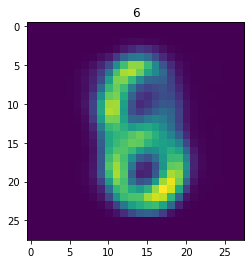

====> Epoch: 30 Average loss: 33.6826
Epoch: 31 [20000/60000 (33%)]	Loss: 34.439797
Epoch: 31 [40000/60000 (67%)]	Loss: 35.480991
Epoch: 31 [60000/60000 (100%)]	Loss: 33.274775


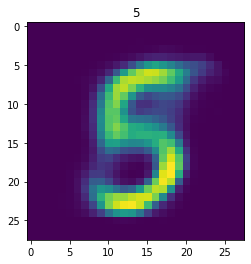

====> Epoch: 31 Average loss: 33.6340
Epoch: 32 [20000/60000 (33%)]	Loss: 33.446450
Epoch: 32 [40000/60000 (67%)]	Loss: 34.076494
Epoch: 32 [60000/60000 (100%)]	Loss: 33.561350


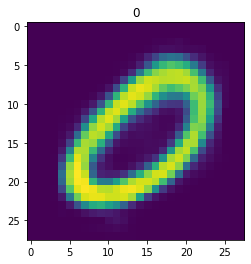

====> Epoch: 32 Average loss: 33.5740
Epoch: 33 [20000/60000 (33%)]	Loss: 33.435806
Epoch: 33 [40000/60000 (67%)]	Loss: 35.297666
Epoch: 33 [60000/60000 (100%)]	Loss: 34.420830


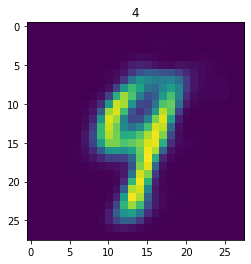

====> Epoch: 33 Average loss: 33.5392
Epoch: 34 [20000/60000 (33%)]	Loss: 32.552209
Epoch: 34 [40000/60000 (67%)]	Loss: 33.396196
Epoch: 34 [60000/60000 (100%)]	Loss: 33.955547


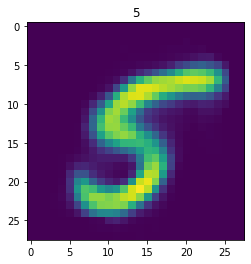

====> Epoch: 34 Average loss: 33.4929
Epoch: 35 [20000/60000 (33%)]	Loss: 33.262271
Epoch: 35 [40000/60000 (67%)]	Loss: 34.178853
Epoch: 35 [60000/60000 (100%)]	Loss: 31.622241


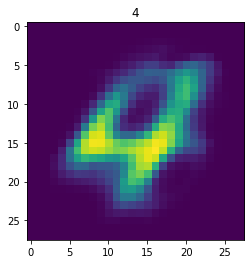

====> Epoch: 35 Average loss: 33.4414
Epoch: 36 [20000/60000 (33%)]	Loss: 32.643115
Epoch: 36 [40000/60000 (67%)]	Loss: 33.421450
Epoch: 36 [60000/60000 (100%)]	Loss: 33.178743


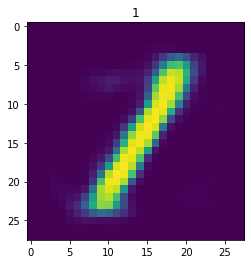

====> Epoch: 36 Average loss: 33.4070
Epoch: 37 [20000/60000 (33%)]	Loss: 32.848420
Epoch: 37 [40000/60000 (67%)]	Loss: 34.807495
Epoch: 37 [60000/60000 (100%)]	Loss: 34.628442


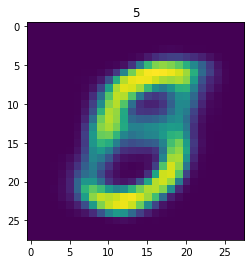

====> Epoch: 37 Average loss: 33.3518
Epoch: 38 [20000/60000 (33%)]	Loss: 33.458772
Epoch: 38 [40000/60000 (67%)]	Loss: 32.738936
Epoch: 38 [60000/60000 (100%)]	Loss: 33.750283


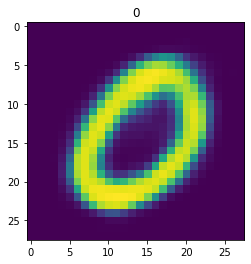

====> Epoch: 38 Average loss: 33.3297
Epoch: 39 [20000/60000 (33%)]	Loss: 31.324795
Epoch: 39 [40000/60000 (67%)]	Loss: 33.900718
Epoch: 39 [60000/60000 (100%)]	Loss: 32.980500


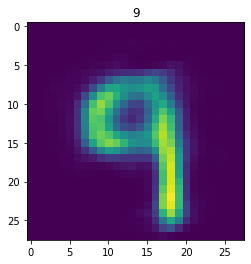

====> Epoch: 39 Average loss: 33.2853
Epoch: 40 [20000/60000 (33%)]	Loss: 34.202070
Epoch: 40 [40000/60000 (67%)]	Loss: 34.111260
Epoch: 40 [60000/60000 (100%)]	Loss: 33.974072


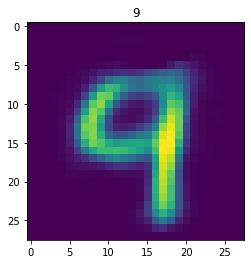

====> Epoch: 40 Average loss: 33.2628
Epoch: 41 [20000/60000 (33%)]	Loss: 32.354812
Epoch: 41 [40000/60000 (67%)]	Loss: 32.061252
Epoch: 41 [60000/60000 (100%)]	Loss: 34.696736


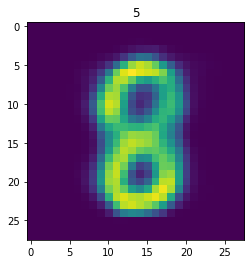

====> Epoch: 41 Average loss: 33.2156
Epoch: 42 [20000/60000 (33%)]	Loss: 32.022305
Epoch: 42 [40000/60000 (67%)]	Loss: 33.914629
Epoch: 42 [60000/60000 (100%)]	Loss: 33.587876


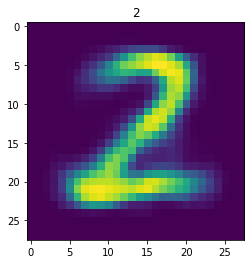

====> Epoch: 42 Average loss: 33.1918
Epoch: 43 [20000/60000 (33%)]	Loss: 34.061113
Epoch: 43 [40000/60000 (67%)]	Loss: 33.097883
Epoch: 43 [60000/60000 (100%)]	Loss: 33.496001


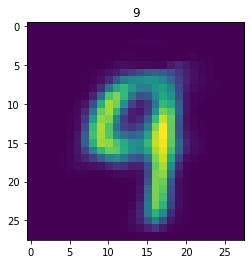

====> Epoch: 43 Average loss: 33.1398
Epoch: 44 [20000/60000 (33%)]	Loss: 32.480361
Epoch: 44 [40000/60000 (67%)]	Loss: 31.632983
Epoch: 44 [60000/60000 (100%)]	Loss: 31.037290


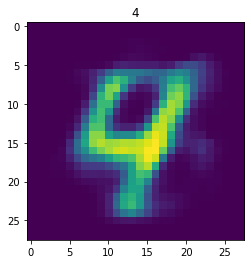

====> Epoch: 44 Average loss: 33.1195
Epoch: 45 [20000/60000 (33%)]	Loss: 31.661411
Epoch: 45 [40000/60000 (67%)]	Loss: 31.636455
Epoch: 45 [60000/60000 (100%)]	Loss: 32.452505


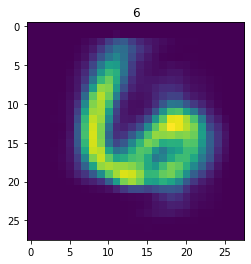

====> Epoch: 45 Average loss: 33.0649
Epoch: 46 [20000/60000 (33%)]	Loss: 33.880259
Epoch: 46 [40000/60000 (67%)]	Loss: 32.338579
Epoch: 46 [60000/60000 (100%)]	Loss: 32.665552


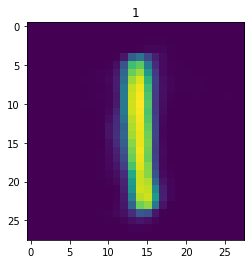

====> Epoch: 46 Average loss: 33.0357
Epoch: 47 [20000/60000 (33%)]	Loss: 33.422529
Epoch: 47 [40000/60000 (67%)]	Loss: 32.250688
Epoch: 47 [60000/60000 (100%)]	Loss: 34.827991


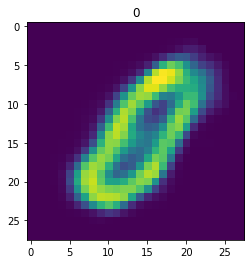

====> Epoch: 47 Average loss: 33.0313
Epoch: 48 [20000/60000 (33%)]	Loss: 33.026270
Epoch: 48 [40000/60000 (67%)]	Loss: 35.821091
Epoch: 48 [60000/60000 (100%)]	Loss: 31.646587


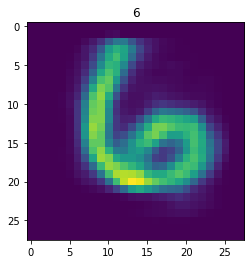

====> Epoch: 48 Average loss: 32.9892
Epoch: 49 [20000/60000 (33%)]	Loss: 32.830315
Epoch: 49 [40000/60000 (67%)]	Loss: 33.830020
Epoch: 49 [60000/60000 (100%)]	Loss: 34.027678


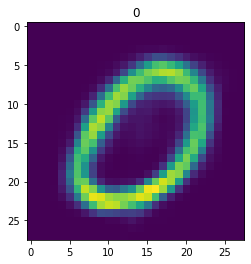

====> Epoch: 49 Average loss: 32.9625
Finished Training


In [4]:
for epoch in range(50):  # loop over the dataset multiple times

    total_loss = 0.0
    for i, data in enumerate(train_loader,start = 1):
        
        inputs = data[0].flatten(start_dim=1)

        # zero the parameter gradients
        optimizer.zero_grad()
        
        # forward + backward + optimize
        model_x,μ,log_var,ϵ,z = vae(inputs)
        loss = criterion(model_x,inputs,μ,log_var,ϵ,z)
        loss.backward()
        optimizer.step()
        
        total_loss += loss.item()
    
        if i % 100 == 0:
            print('Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, i * len(inputs), len(train_loader.dataset),
                (100*(len(inputs) * i) / len(train_loader.dataset)), loss.item() / len(inputs)))
            
    sample_idx = np.random.randint(len(mnist_trainset))
    μ,σ = vae.encode(torch.stack((mnist_trainset[sample_idx][0].flatten(),mnist_trainset[sample_idx][0].flatten())))
    z,ϵ = vae.sample(μ,σ)
    x = vae.decode(z.unsqueeze(dim=1))
    plt.imshow(x[1].detach().numpy().reshape(28,28))
    plt.title(mnist_trainset[sample_idx][1])
    plt.show()
            
    print('====> Epoch: {} Average loss: {:.4f}'.format(epoch, total_loss / len(train_loader.dataset)))
    
        
print('Finished Training')

In [5]:
Zx = [[] for i in range(10)]
Zy = [[] for i in range(10)]
Zz = [[] for i in range(10)]
Zr = [[] for i in range(10)]
for i in range(len(mnist_trainset)):
    if i % 10000 == 0:
        print(i)
    μ,σ = vae.encode(torch.stack((mnist_trainset[i][0].flatten(),mnist_trainset[i][0].flatten())))
    z,ϵ = vae.sample(μ,σ)
    Zx[mnist_trainset[i][1]].append(z[0].detach().numpy()[0])
    Zy[mnist_trainset[i][1]].append(z[0].detach().numpy()[1])
    Zz[mnist_trainset[i][1]].append(z[0].detach().numpy()[2])
    Zr[mnist_trainset[i][1]].append(z[0].detach().numpy()[2])

0
10000
20000
30000
40000
50000


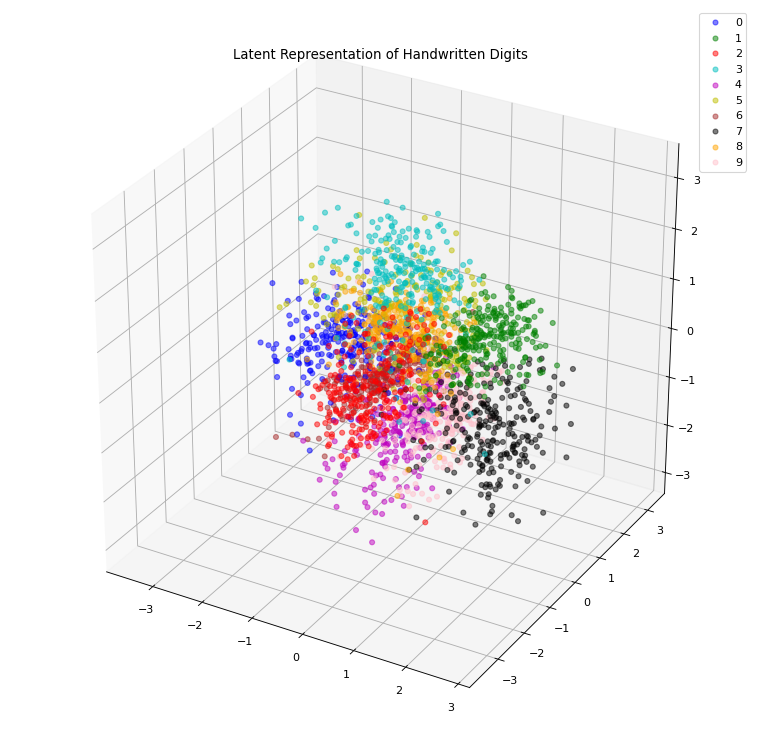

In [6]:
fig = plt.figure(figsize=(12, 12),dpi=80)

ax = fig.add_subplot(projection='3d')
N = 250

C = ['b','g','r','c','m','y','brown','black','orange','pink']
for i in range(10):
    ax.scatter(Zx[i][:N],Zy[i][:N],Zz[i][:N],label=i,alpha=0.5,color=C[i])
    
for i in range(0,10,-1):
    plt.scatter(Zx[i][N:2*N],Zy[i][N:2*N],Zz[i][N:2*N],label=i,alpha=0.5,color=C[i])

plt.legend()
plt.title("Latent Representation of Handwritten Digits")
plt.show()

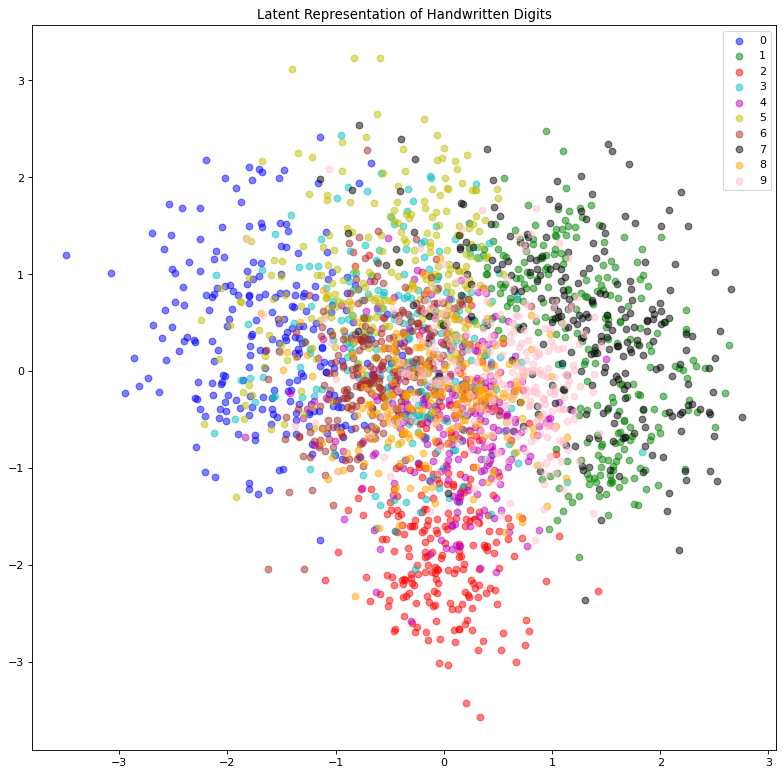

In [7]:
fig = plt.figure(figsize=(12, 12),dpi=80)

ax = fig.add_subplot()
N = 250

C = ['b','g','r','c','m','y','brown','black','orange','pink']
for i in range(10):
    ax.scatter(Zx[i][:N],Zy[i][:N],label=i,alpha=0.5,color=C[i])
    
for i in range(0,10,-1):
    plt.scatter(Zx[i][N:2*N],Zy[i][N:2*N],Zz[i][N:2*N],label=i,alpha=0.5,color=C[i])

plt.legend()
plt.title("Latent Representation of Handwritten Digits")
plt.show()

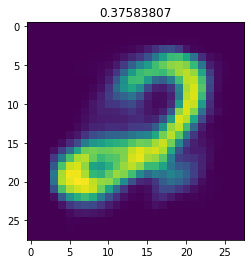

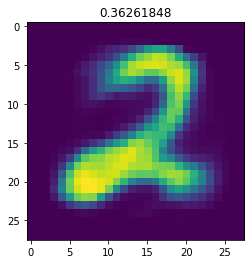

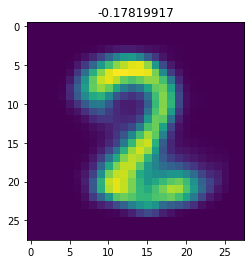

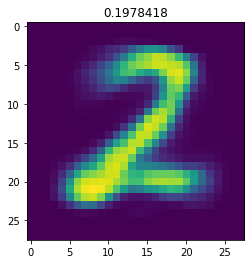

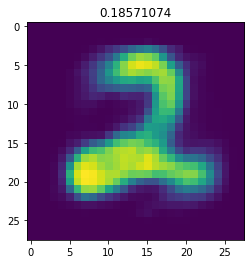

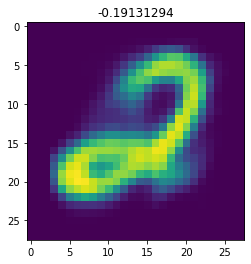

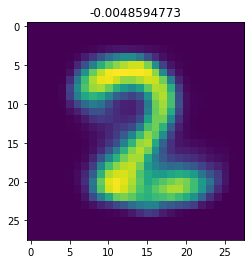

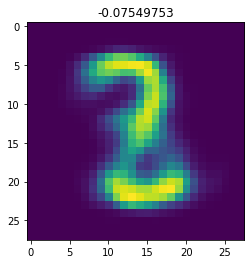

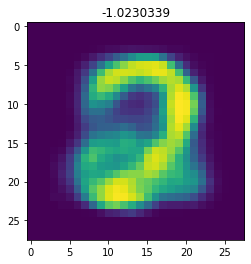

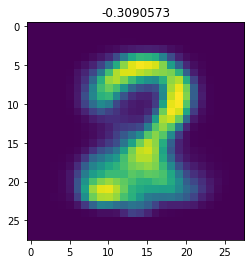

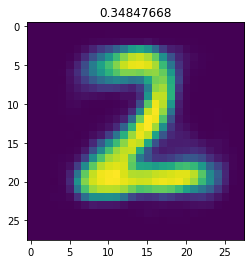

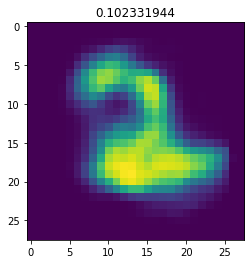

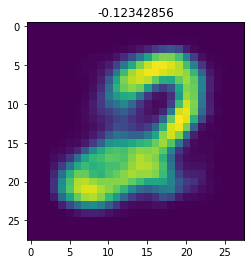

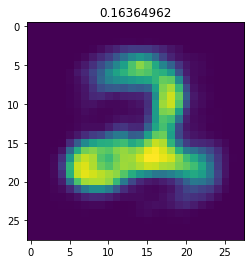

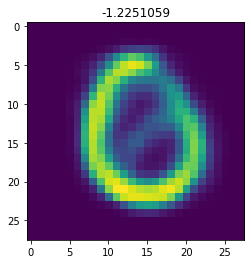

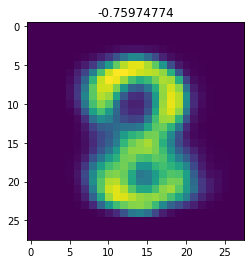

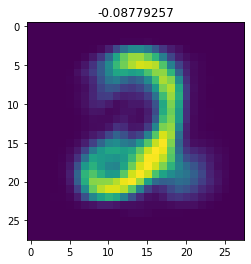

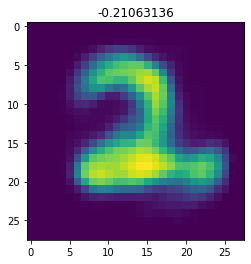

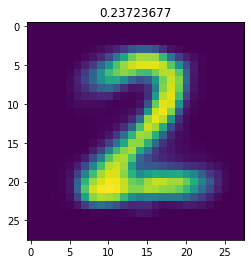

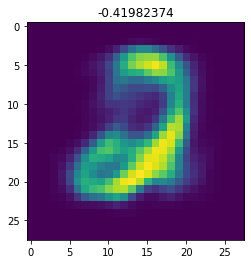

In [8]:
for i in range(20):

    sample_idx = np.random.randint(len(mnist_trainset))
    while (mnist_trainset[sample_idx][1]) != 2:
        sample_idx = np.random.randint(len(mnist_trainset))
    
    μ,σ = vae.encode(torch.stack((mnist_trainset[sample_idx][0].flatten(),mnist_trainset[sample_idx][0].flatten())))
    z,ϵ = vae.sample(μ,σ)
    x = vae.decode(z.unsqueeze(dim=1))
    plt.imshow(x[1].detach().numpy().reshape(28,28))
    plt.title(z[0].detach().numpy()[0])
    plt.show()